In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

seed = 1000

%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')

# 预处理数据

In [2]:
train_raw = pd.read_csv('train.csv')

In [3]:
test_raw = pd.read_csv('test.csv')

In [4]:
store = pd.read_csv('store.csv')

In [5]:
train_merge = pd.merge(train_raw,store,on="Store")

In [6]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


##  Store Popularity pic

In [7]:
train_merge_nozero = train_merge.query('Open!=0')

In [8]:
customer_perstore =train_merge_nozero.groupby(['Store'])['Customers'].median()

In [9]:
customer_perstore = pd.DataFrame(customer_perstore)

In [10]:
customer_perstore.columns = ['store_popularity']

In [11]:
train_merge= pd.merge(train_merge,customer_perstore,left_on='Store',right_index=True)

In [12]:
train_merge['Date']=pd.to_datetime(train_merge['Date'])
train_merge['Month'] = train_merge['Date'].map(lambda x: x.month)
train_merge['Year'] = train_merge['Date'].map(lambda x: x.year)

train_merge_nozero['Date']=pd.to_datetime(train_merge_nozero['Date'])
train_merge_nozero['Month'] = train_merge_nozero['Date'].map(lambda x: x.month)
train_merge_nozero['Year'] = train_merge_nozero['Date'].map(lambda x: x.year)

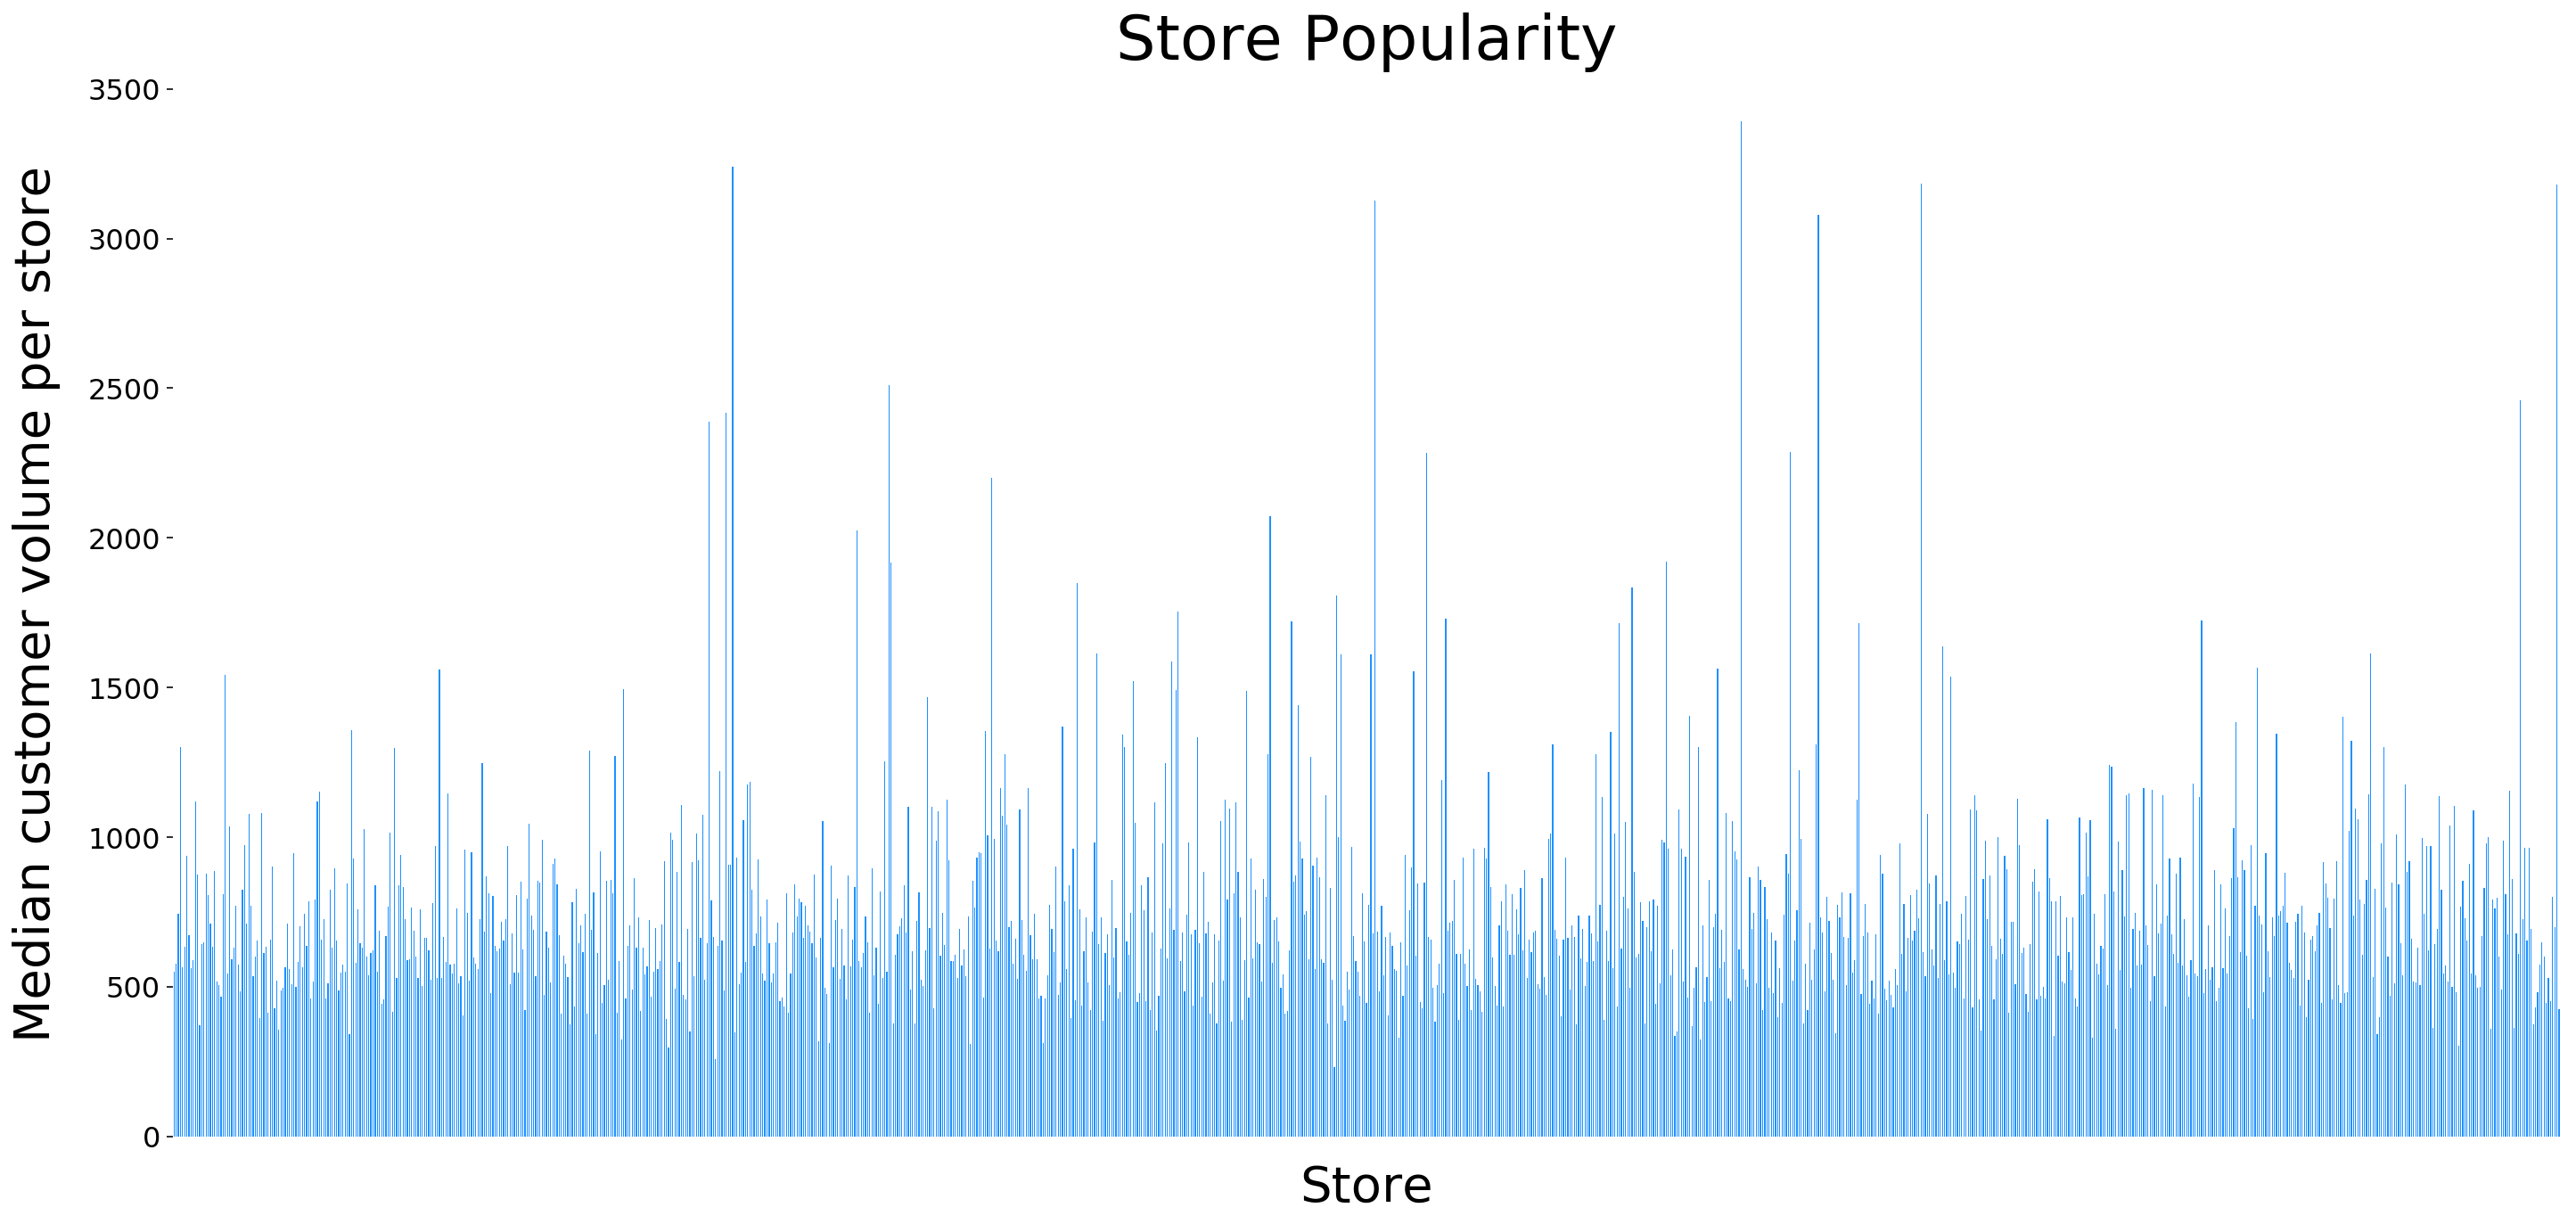

In [15]:
fig = plt.figure(figsize=(24, 11))
fig.add_axes()
ax = plt.gca()
train_merge_nozero.groupby(['Store'])['Customers'].median().plot(kind='bar',color='#1E90FF')
# plt.axhline(y=8000,linewidth=3, color='r',linestyle='--')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_xticklines(),visible=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(fontsize = 16)
ax.set_xlabel('Store',fontsize=28,labelpad = 15)
ax.set_ylabel('Median customer volume per store',fontsize=28,labelpad = 15)
plt.title('Store Popularity', fontsize=35)
plt.savefig(r'./pic/store.png')

In [ ]:
# fig = plt.figure(figsize=(12, 10))
# ax=plt.gca()
# customer_perstore.plot(kind='density',ax=ax,legend=False)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.yaxis.label.set_visible(False)
# ax.set_xlabel('Popularity',fontsize=24,labelpad = 15)
# plt.title('Store popularity Density', fontsize=30)
# plt.savefig(r'./pic/customer_store.png')

In [44]:
median_sales = pd.DataFrame(train_merge_nozero.groupby(['Store'])['Sales'].median())

consumption = median_sales.join(customer_perstore)

consumption['consumption_power'] = consumption['Sales'] / consumption['store_popularity'] 

consumption = median_sales.join(customer_perstore)

consumption['consumption_power'] = consumption['Sales'] / consumption['store_popularity'] 

##  Consumption Power

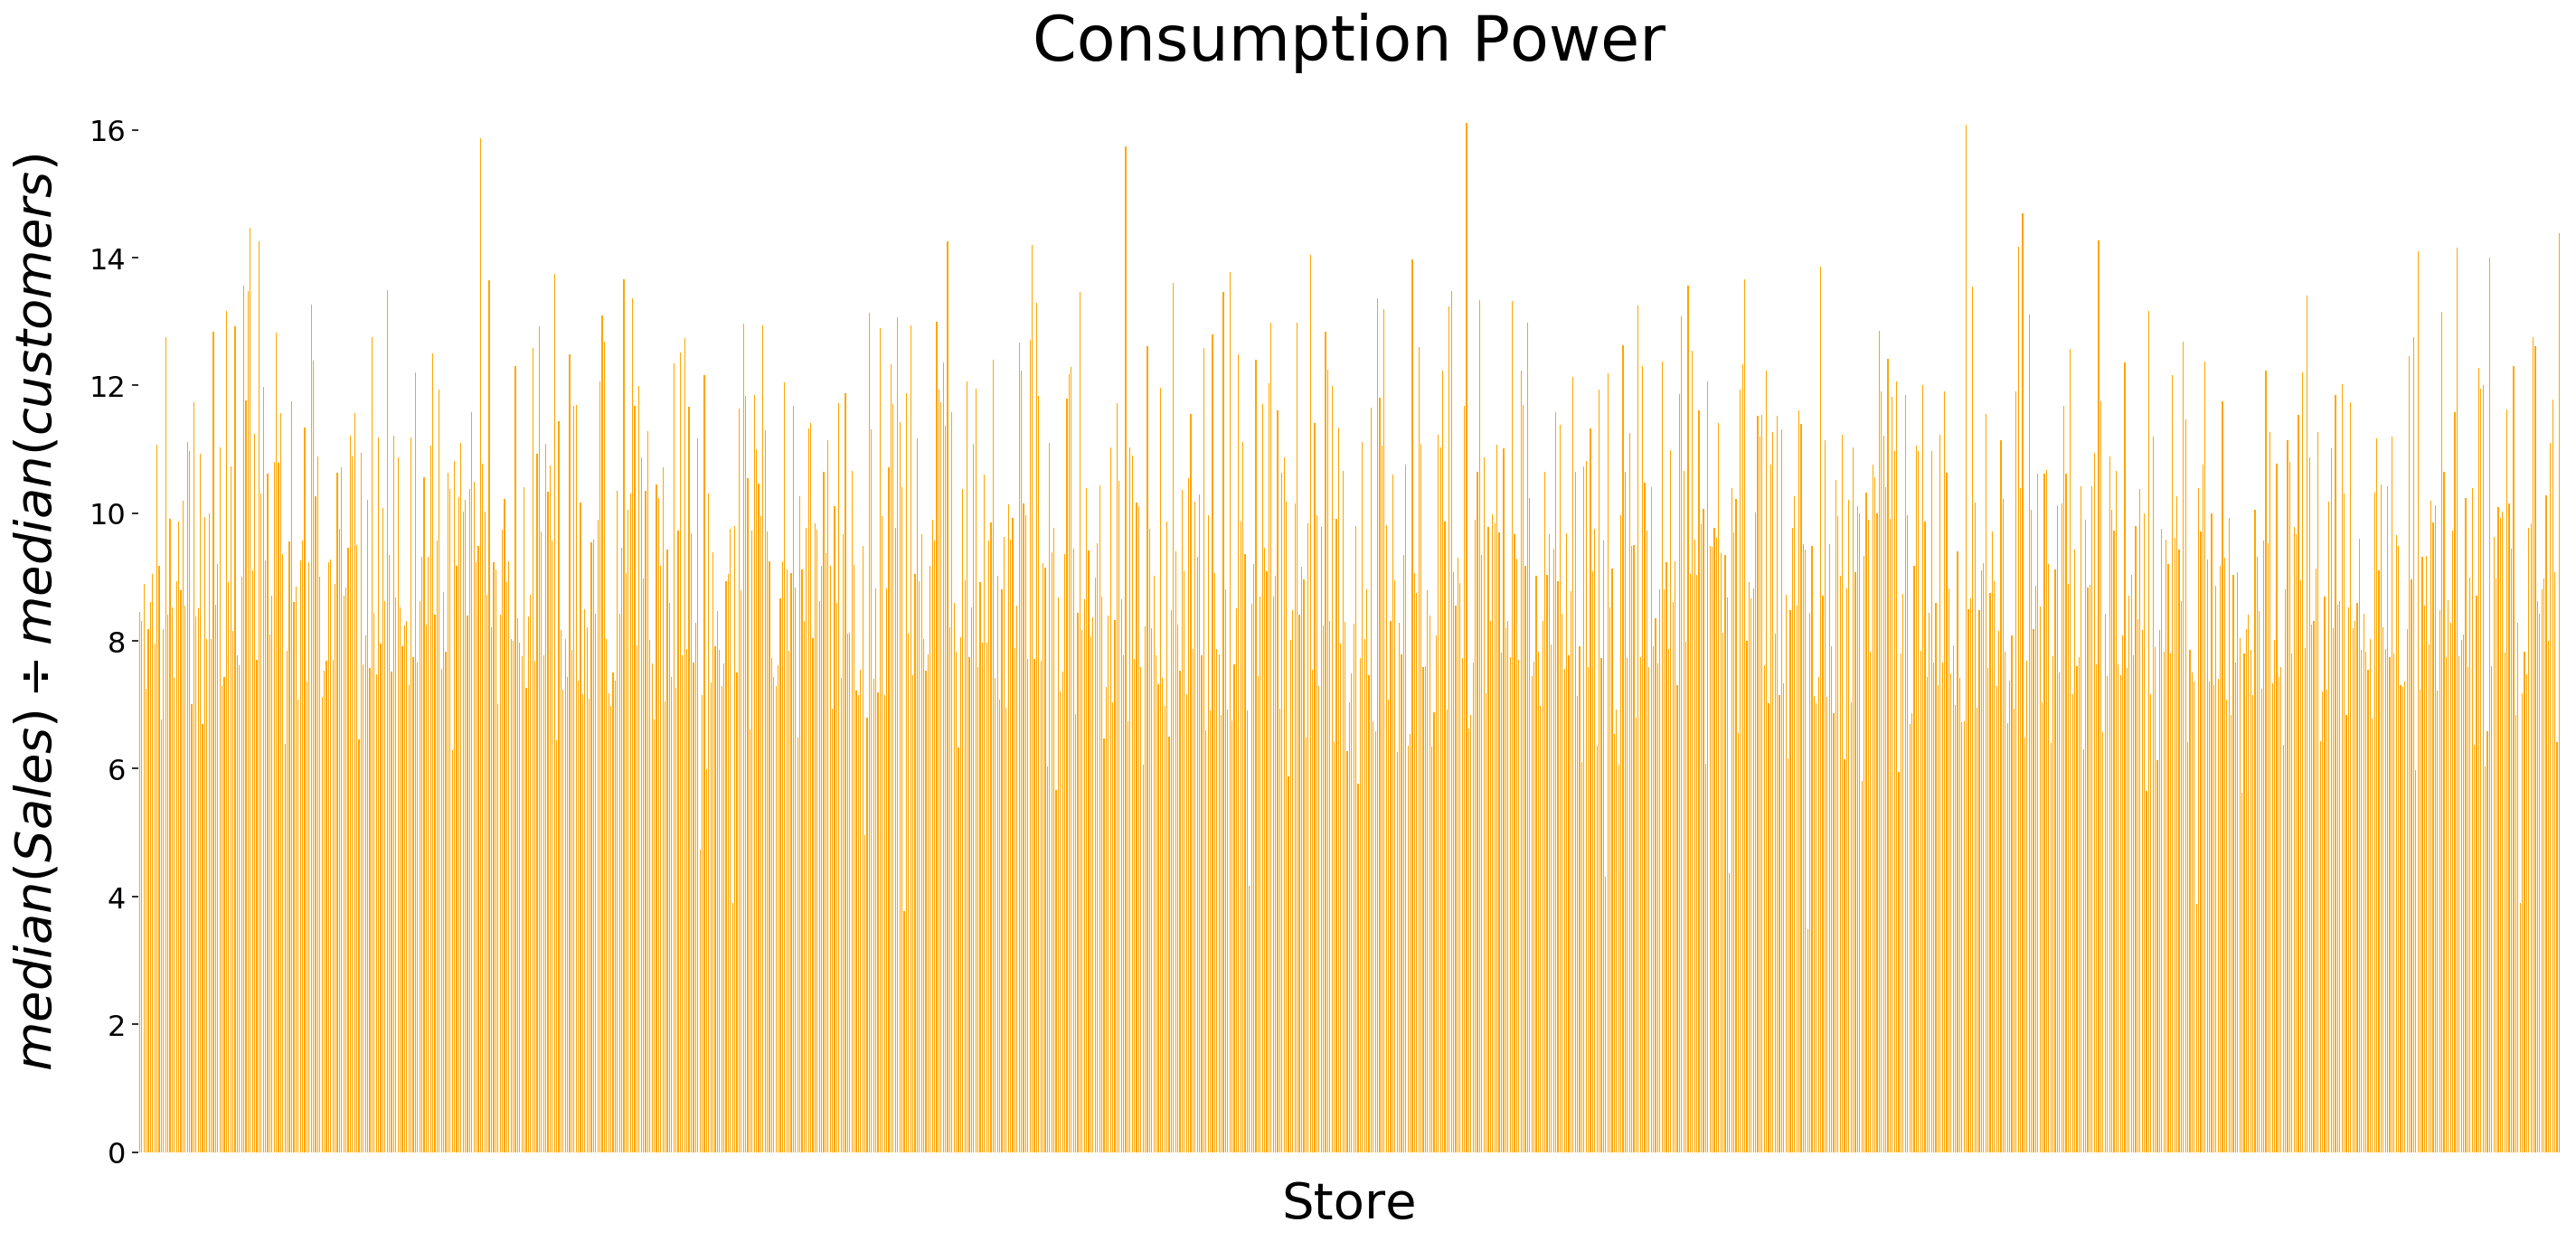

In [45]:
fig = plt.figure(figsize=(24, 11)) #m median(Sales) / median(customers) per store
fig.add_axes()
ax = plt.gca()
consumption['consumption_power'].plot(kind='bar',color='orange',ax=ax)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_xticklines(),visible=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(fontsize = 16)
ax.set_xlabel('Store',fontsize=28,labelpad = 15)
ax.set_ylabel(r'$median(Sales) \div median(customers)$',fontsize=28,labelpad = 15)
plt.title('Consumption Power', fontsize=35)
plt.savefig(r'./pic/consumption_power.png')

## sales pic

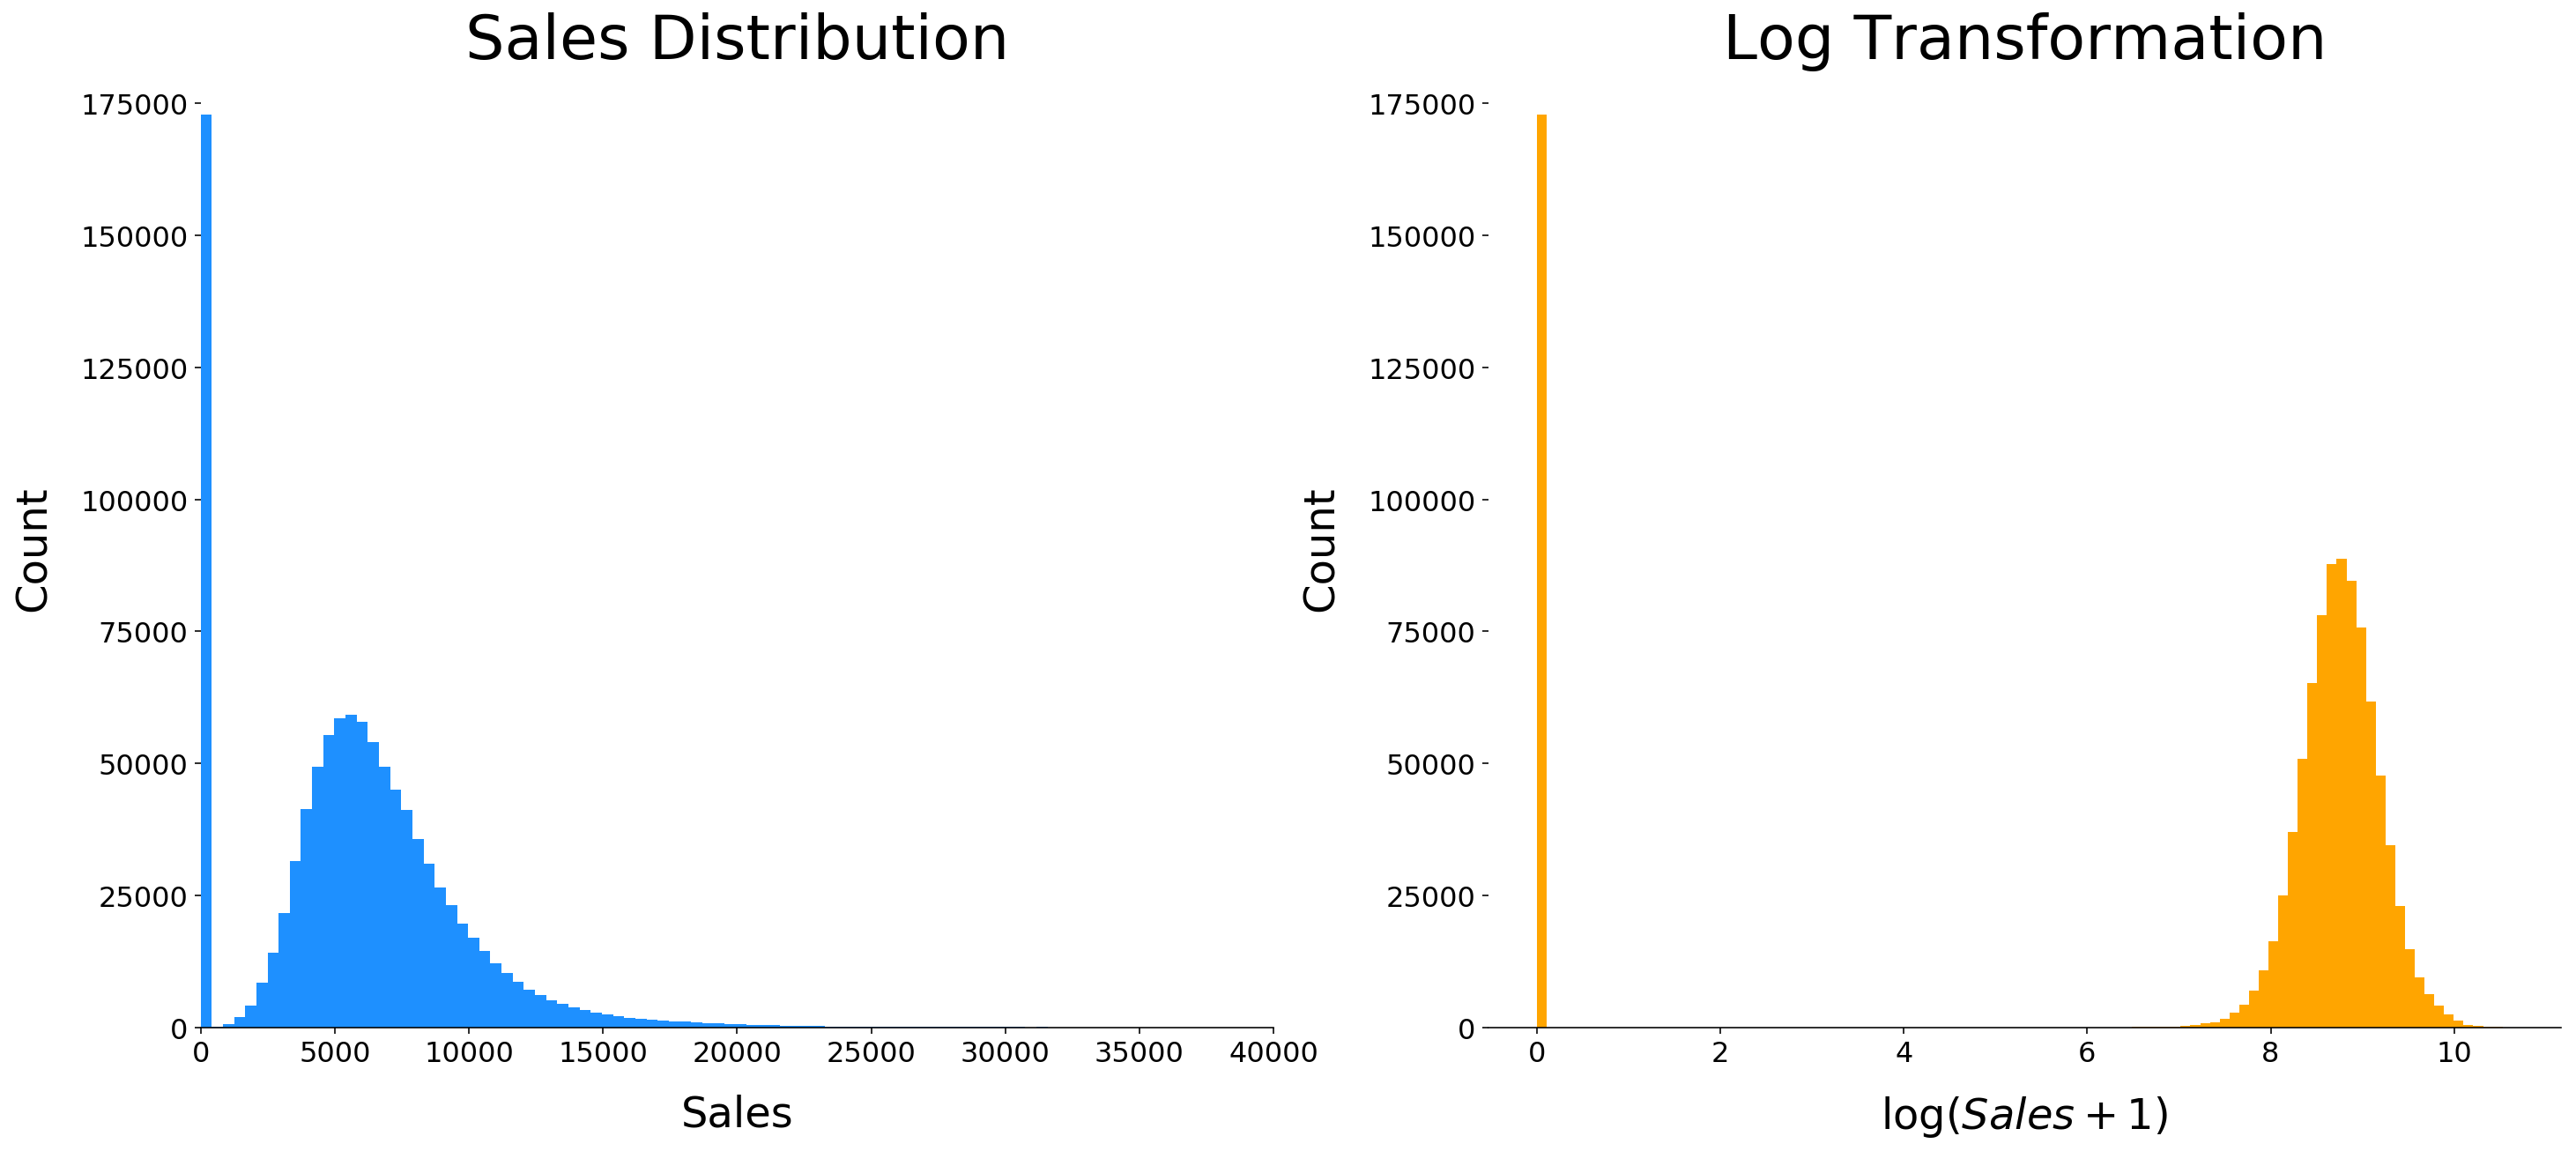

In [88]:
fig = plt.figure(figsize=(24, 10))
fig.add_axes()
ax1 = fig.add_subplot(121)
ax1.hist(train_raw['Sales'],bins=100,color='#1E90FF')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.title('Sales Distribution', fontsize=35)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
ax1.set_xlabel('Sales',fontsize=24,labelpad = 15)
ax1.set_ylabel('Count',fontsize=24,labelpad = 15)
ax1.set(xlim=[0,40000])
# ax.xaxis.set_visible(False)

ax2 = fig.add_subplot(122)
ax2.hist(np.log(train_raw['Sales']+1),bins=100,color='orange')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.title('Log Transformation', fontsize=35)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
ax2.set_xlabel(r'$\log(Sales+1)$',fontsize=24,labelpad = 15)
ax2.set_ylabel('Count',fontsize=24,labelpad = 15)
# ax2.set(xlim=[6,12])
plt.savefig(r'./pic/sales.png')

In [36]:
train_raw.loc[train_raw['Sales']>0,'Sales'].skew()

1.5949288357537479

In [17]:
np.log(train_raw.loc[train_raw['Sales']>0,'Sales']).skew()

-0.10968460576537623

In [11]:
# from scipy.stats import gamma
# dist1 = gamma(0.1, 0, 1) #shape = 0.1 theta = 1
# dist2 = gamma(5, 0, 0.5) #shape = 5 theta = 0.5

# x = np.linspace(1E-6, 10, 1000)
# y1 = dist1.pdf(x)
# y2 = dist2.pdf(x)
# y3 = 0.2*y1+0.8*y2

# fig = plt.figure(figsize=(24, 10))
# fig.add_axes()
# ax1 = fig.add_subplot(121)
# ax1.hist(train_raw['Sales'],bins=50,color='#1E90FF')
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)
# ax1.spines['left'].set_visible(False)
# plt.title('Sales Distribution', fontsize=35)
# plt.xticks(fontsize = 16)
# plt.yticks(fontsize = 16)
# ax1.set_xlabel('Sales',fontsize=24,labelpad = 15)
# ax1.set_ylabel('Count',fontsize=24,labelpad = 15)
# ax1.set(xlim=[0,40000])
# ax1.xaxis.set_visible(False)
# ax2 = fig.add_subplot(122)
# ax2.plot(x, y1, ls='-', c='#1E90FF',linewidth=3.5,
#              label=r'$k=0.1,\ \theta=1$')
# ax2.plot(x, y2, ls='-.', c='#2E8B57',linewidth=3.5,label=r'$k=5,\ \theta=0.5$')
# ax2.plot(x, y3, ls=':', c='red',linewidth=6,label=r'combined')
# ax2.spines['right'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax2.spines['left'].set_visible(False)
# ax2.set(ylim=[0,0.5])
# plt.title('Gamma Distribution', fontsize=35)
# ax2.xaxis.set_visible(False)
# ax2.yaxis.set_visible(False)
# ax2.legend(loc='best',fontsize='xx-large')
# plt.savefig(r'./pic/sales-gamma.png')

## Open pic

In [327]:
y=train_merge.groupby(['Open'])['Sales'].sum()

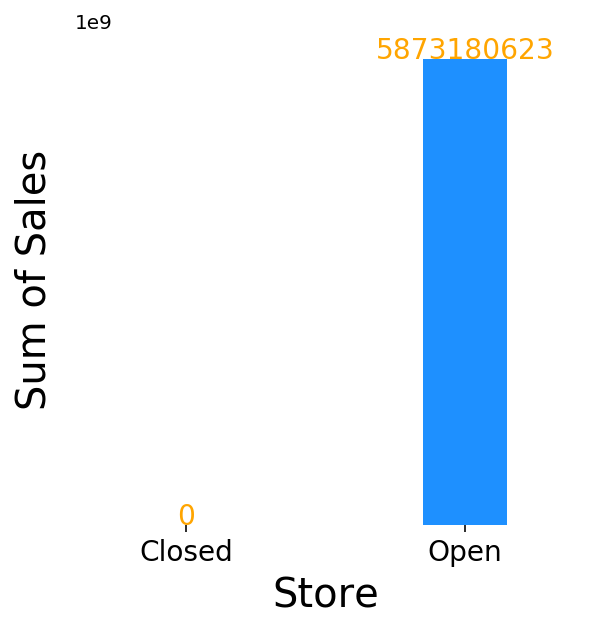

In [336]:
fig = plt.figure(figsize=(4.5, 4.5))
ax = plt.gca()
train_merge.groupby(['Open'])['Sales'].sum().plot(kind='bar',color='#1E90FF',width=0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([0,1],['Closed','Open'],rotation=360,fontsize=14)
ax.set_xlabel('Store',fontsize=20,labelpad = 5)
ax.set_ylabel('Sum of Sales',fontsize=20,labelpad = 10)
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_yticklines(),visible=False)
for i, v in enumerate(y):
    ax.text(i, v+2, str(v), color='#FFA500',ha='center',fontsize=14)
plt.savefig(r'./pic/Open.png')

## DayofWeek, Month, Year pic

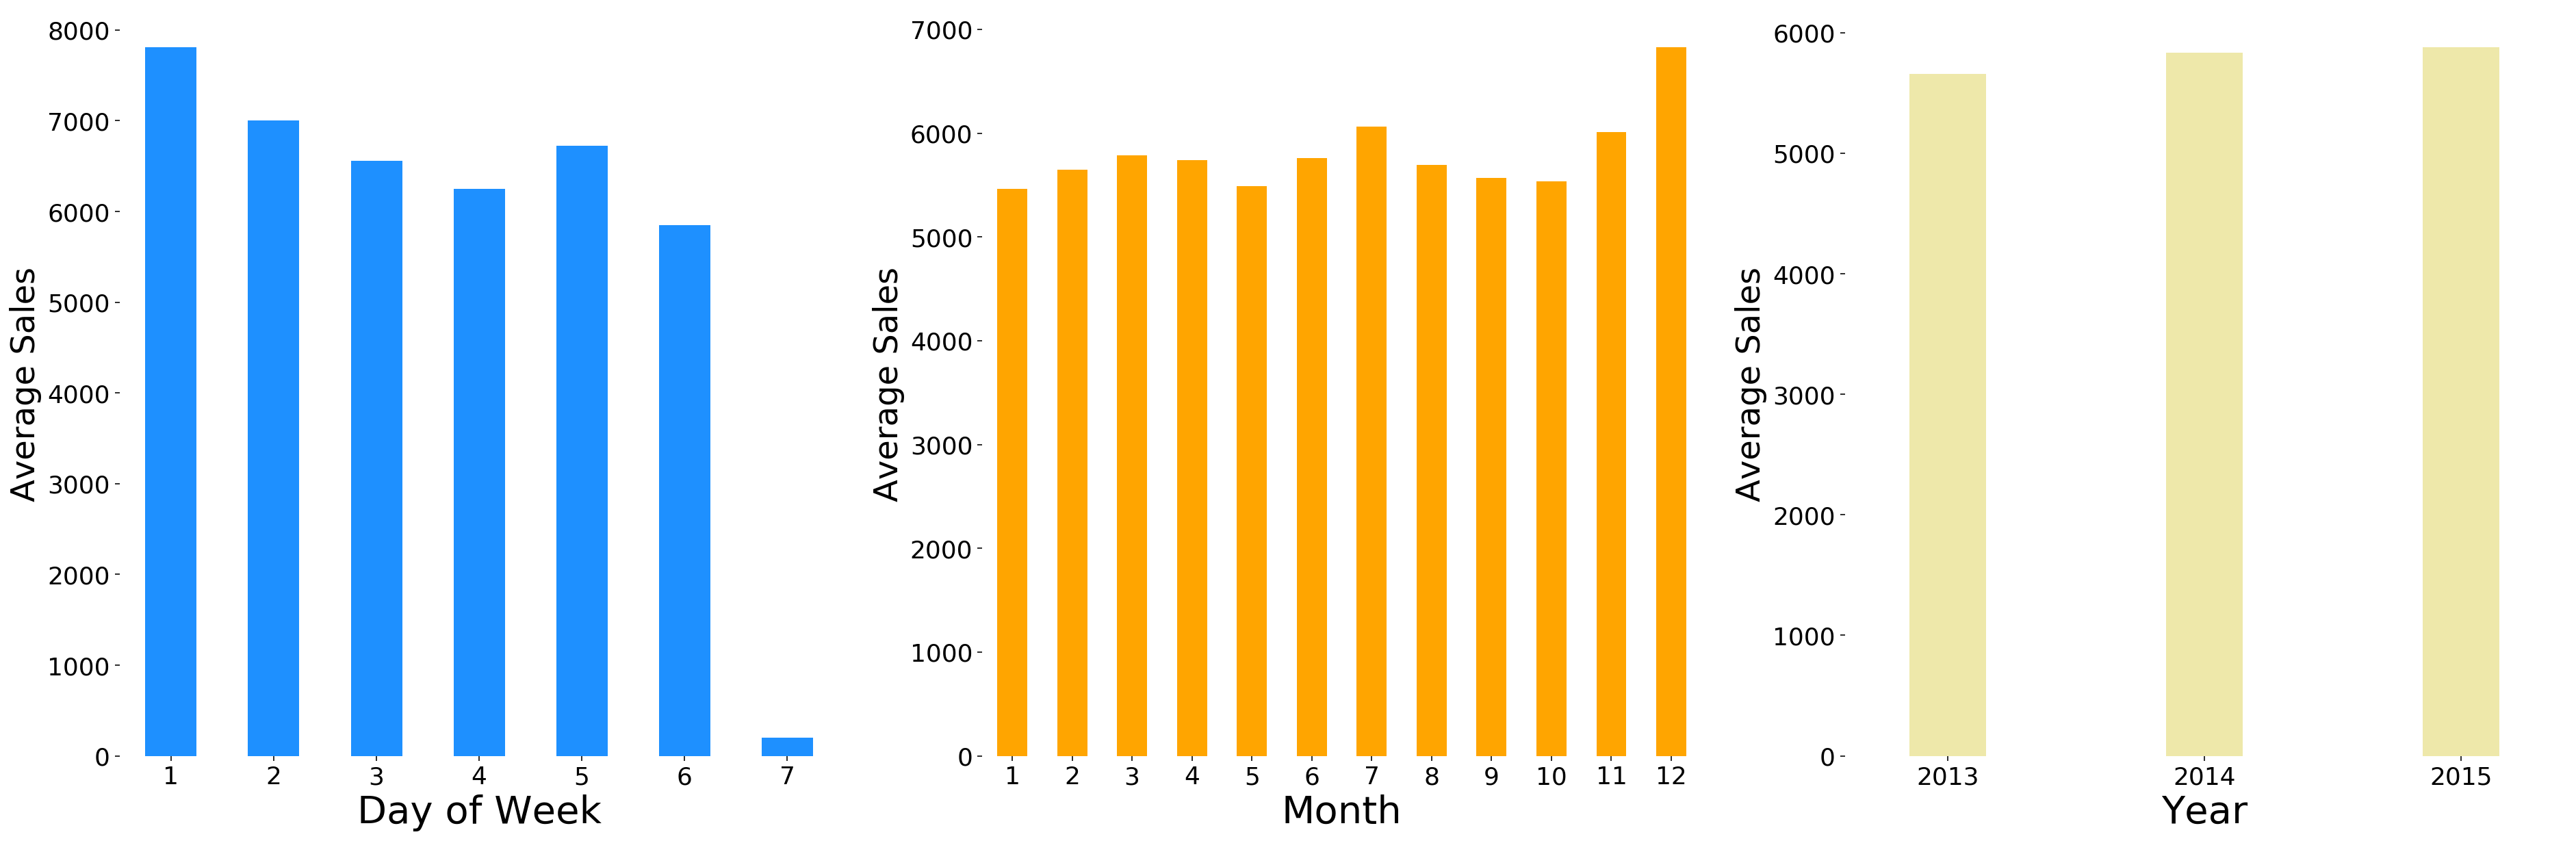

In [321]:
fig = plt.figure(figsize=(32, 10))
fig.add_axes()
ax1 = fig.add_subplot(131)
train_merge.groupby(['DayOfWeek'])['Sales'].mean().plot(kind='bar',color='#1E90FF',ax=ax1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.xticks(rotation=360,fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Day of Week',fontsize=28)
plt.ylabel('Average Sales',fontsize=24)
ax2 = fig.add_subplot(132)
train_merge.groupby(['Month'])['Sales'].mean().plot(kind='bar',color='orange',ax=ax2)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.xticks(rotation=360,fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Month',fontsize=28)
plt.ylabel('Average Sales',fontsize=24)
ax3 = fig.add_subplot(133)
train_merge.groupby(['Year'])['Sales'].mean().plot(kind='bar',color='#EEE8AA',ax=ax3,width=0.3)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
plt.xticks(rotation=360,fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Year',fontsize=28)
plt.ylabel('Average Sales',fontsize=24)
plt.savefig(r'./pic/dayofweek_month_year.png')

## Promo pic

In [337]:
y0 = round(np.mean(train_merge.query('Promo==0')['Sales']),0)
y1 = round(np.mean(train_merge.query('Promo==1')['Sales']),0)

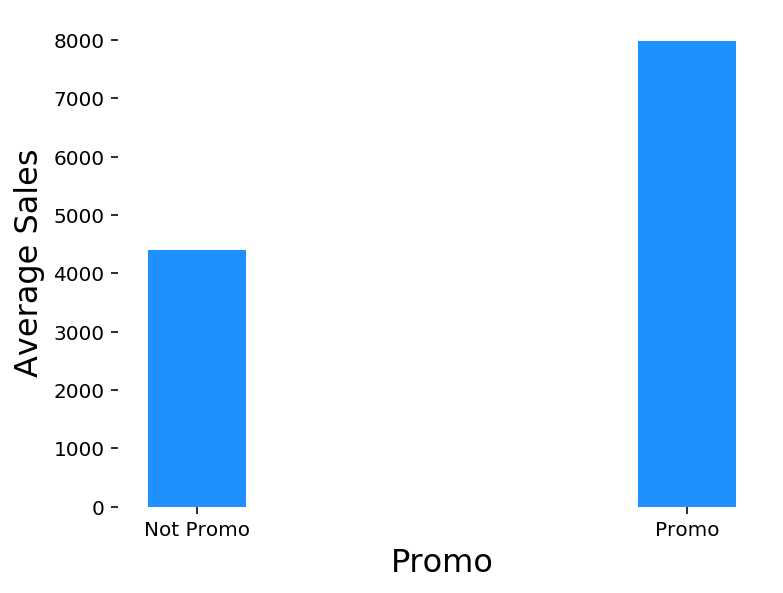

In [342]:
fig = plt.figure(figsize=(5.8, 4.5))
ax = plt.gca()
x=np.arange(2)
y=[y0,y1]
plt.bar(x,y,width=0.2,color='#1E90FF')
plt.xticks([0,1], ['Not Promo','Promo'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xlabel('Promo',fontsize=16)
plt.ylabel('Average Sales',fontsize=16)
plt.savefig(r'./pic/promo.png')

## StateHoliday pic

In [91]:
train_merge.loc[train_merge['StateHoliday'] =='0','StateHoliday']=0

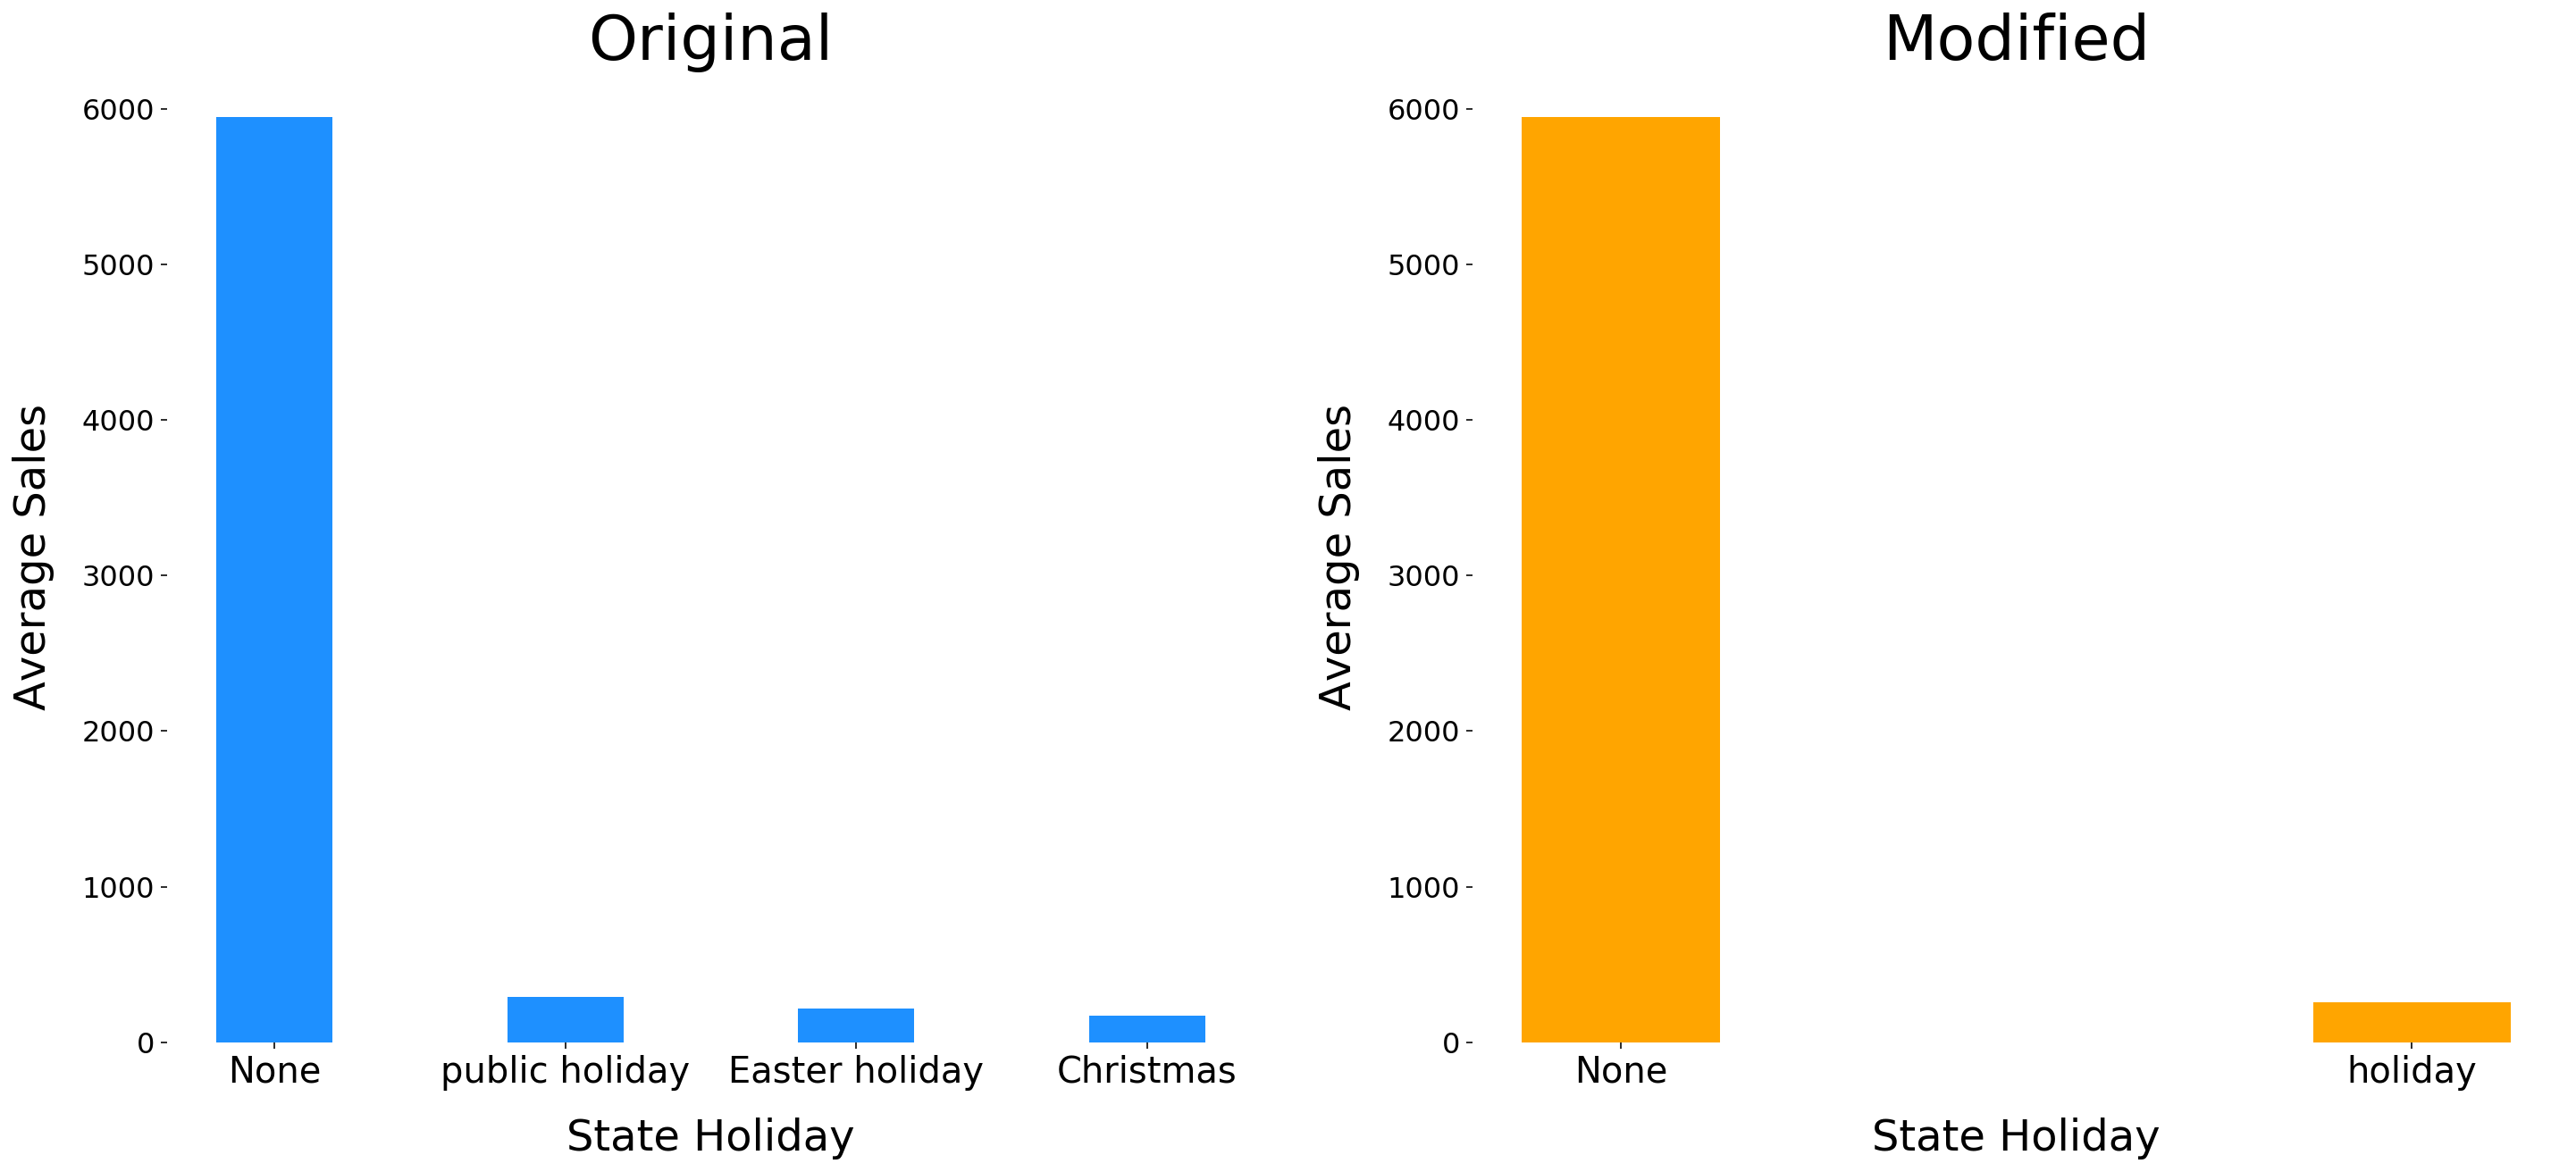

In [94]:
x = np.arange(1,9,2)
y = train_merge.groupby(['StateHoliday'])['Sales'].mean().values

fig = plt.figure(figsize=(24, 10))
fig.add_axes()
ax1 = fig.add_subplot(121)
ax1.bar(x,y,color='#1E90FF')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.xticks([1,3,5,7],('None','public holiday','Easter holiday','Christmas'),fontsize = 20,rotation=360)
plt.yticks(fontsize = 16)
ax1.set_xlabel('State Holiday',fontsize=24,labelpad = 15)
ax1.set_ylabel('Average Sales',fontsize=24,labelpad = 15)
plt.title('Original', fontsize=35)
ax2 = fig.add_subplot(122)
y2 = np.array([5947.48389256,258.1595813204509])
x2 = np.arange(1,5,2)
ax2.bar(x2,y2,color='orange',width=0.5)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.xticks([1,3,],('None','holiday'),fontsize = 20,rotation=360)
plt.yticks(fontsize = 16)
plt.title('Modified', fontsize=35)
ax2.set_xlabel('State Holiday',fontsize=24,labelpad = 15)
ax2.set_ylabel('Average Sales',fontsize=24,labelpad = 15)
plt.savefig(r'./pic/stateholiday.png')

## Promo2 pic

In [343]:
y0 = round(np.mean(train_merge.query('Promo2==0')['Sales']),0)
y1 = round(np.mean(train_merge.query('Promo2==1')['Sales']),0)

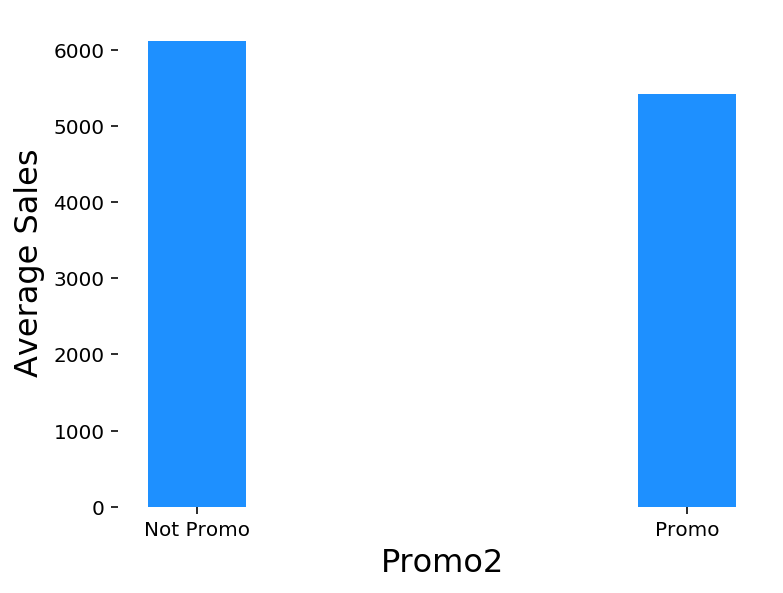

In [344]:
x=[0,1]
y=[y0,y1]
fig = plt.figure(figsize=(5.8, 4.5))
ax = plt.gca()
plt.bar(x,y,width=0.2,color='#1E90FF')
plt.xticks(range(2))
plt.xticks([0,1], ['Not Promo','Promo'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xlabel('Promo2',fontsize=16)
plt.ylabel('Average Sales',fontsize=16)
plt.savefig(r'./pic/promo2.png')

## learning_Curve --- default  pic

In [28]:
learn_curve_default = pd.read_json('./json/learn_curve_default.json')

In [29]:
learn_curve_default

,test_scores_mean,test_scores_std,train_scores_mean,train_scores_std,train_sizes
0,0.325442,0.095460,0.223538,0.015563,22290
1,0.325350,0.096018,0.274247,0.092845,50949
2,0.328331,0.099235,0.257076,0.067798,79608
3,0.325560,0.098262,0.248669,0.052629,108268
4,0.323406,0.096248,0.242848,0.042276,136927
5,0.324394,0.097423,0.241460,0.034272,165586
6,0.324969,0.097649,0.239524,0.032682,194245
7,0.323698,0.095975,0.252211,0.031084,222905


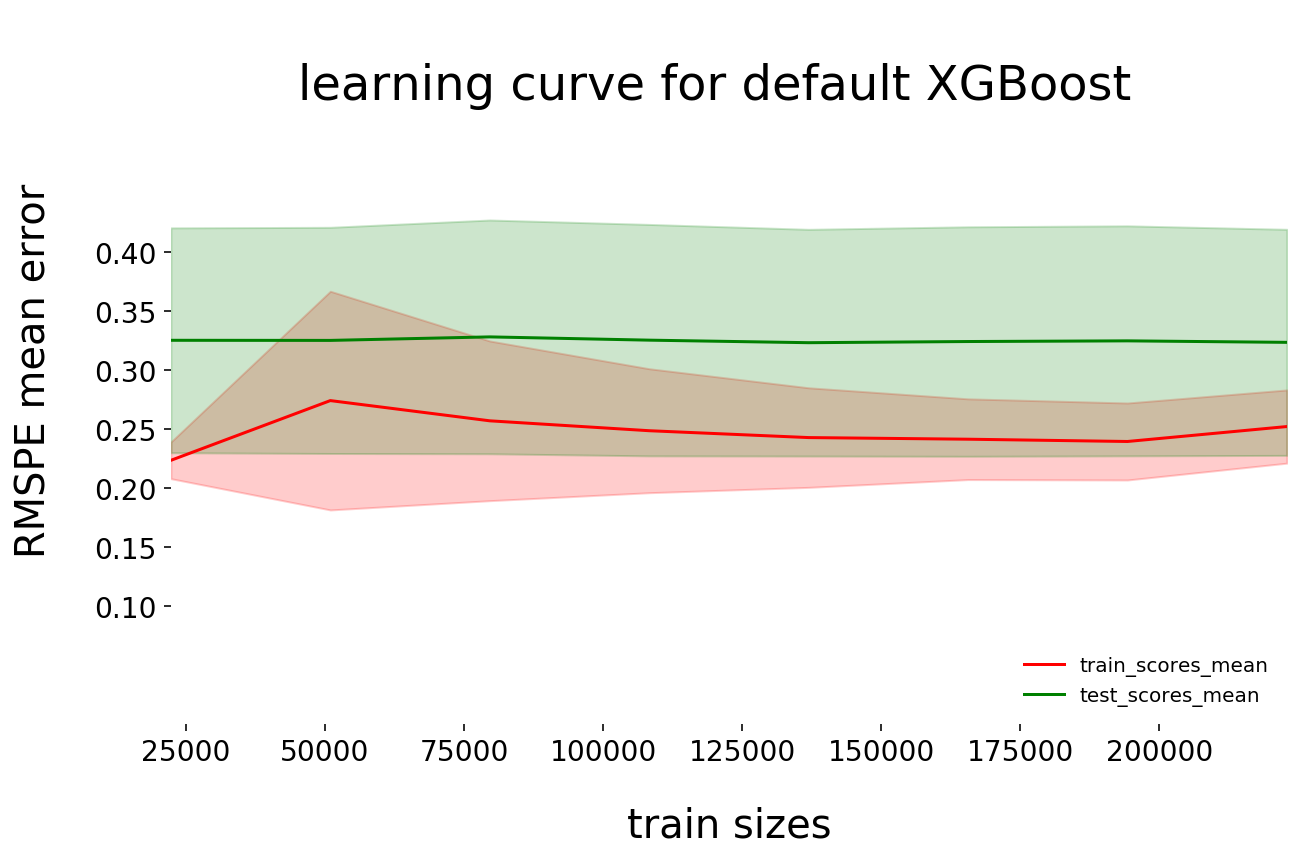

In [98]:
fig = plt.figure(figsize=(10,6.5))
ax = plt.gca()
learn_curve_default.plot('train_sizes','train_scores_mean',ax=ax,color='red')
learn_curve_default.plot('train_sizes','test_scores_mean',ax=ax,color='green')
ax.fill_between(learn_curve_default['train_sizes'],
                learn_curve_default['train_scores_mean'] - learn_curve_default['train_scores_std'],
                learn_curve_default['train_scores_mean'] + learn_curve_default['train_scores_std'],
                alpha=0.2,color='red')
ax.fill_between(learn_curve_default['train_sizes'],
                learn_curve_default['test_scores_mean'] - learn_curve_default['test_scores_std'],
                learn_curve_default['test_scores_mean'] + learn_curve_default['test_scores_std'],
                alpha=0.2,color='green')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.ylim([0.,0.6])
ax.set_xlabel('train sizes',fontsize=20,labelpad = 20)
ax.set_ylabel('RMSPE mean error',fontsize=20,labelpad = 20)
plt.xticks(fontsize=14)
plt.yticks(np.arange(0.1,0.45,0.05),fontsize=14)
plt.legend(loc=4,edgecolor='white')
# plt.title("learning curve for default XGBoost",fontsize=24)
plt.text(120000, 0.53, "learning curve for default XGBoost",horizontalalignment='center',fontsize=24)
plt.savefig(r'./pic/learn_curve_default.png')

## 3.2 RandomizedSearchCV pic

In [13]:
cv_result = pd.read_json('./json/cvresults_random.json')

In [14]:
cv_result = cv_result.drop('params',axis=1)

In [15]:
cv_result.sort_index(inplace=True)


In [16]:
cv_result[cv_result['rank_test_score']==1]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,rank_test_score,...,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
17,248.569136,2.422192,-0.136408,-0.130643,0.8,0.25,8,550,0.8,1,...,-0.138505,-0.133736,-0.145163,-0.124021,-0.133709,-0.117942,1.826513,0.099067,0.006221,0.010934


In [17]:
cv_result = abs(cv_result)

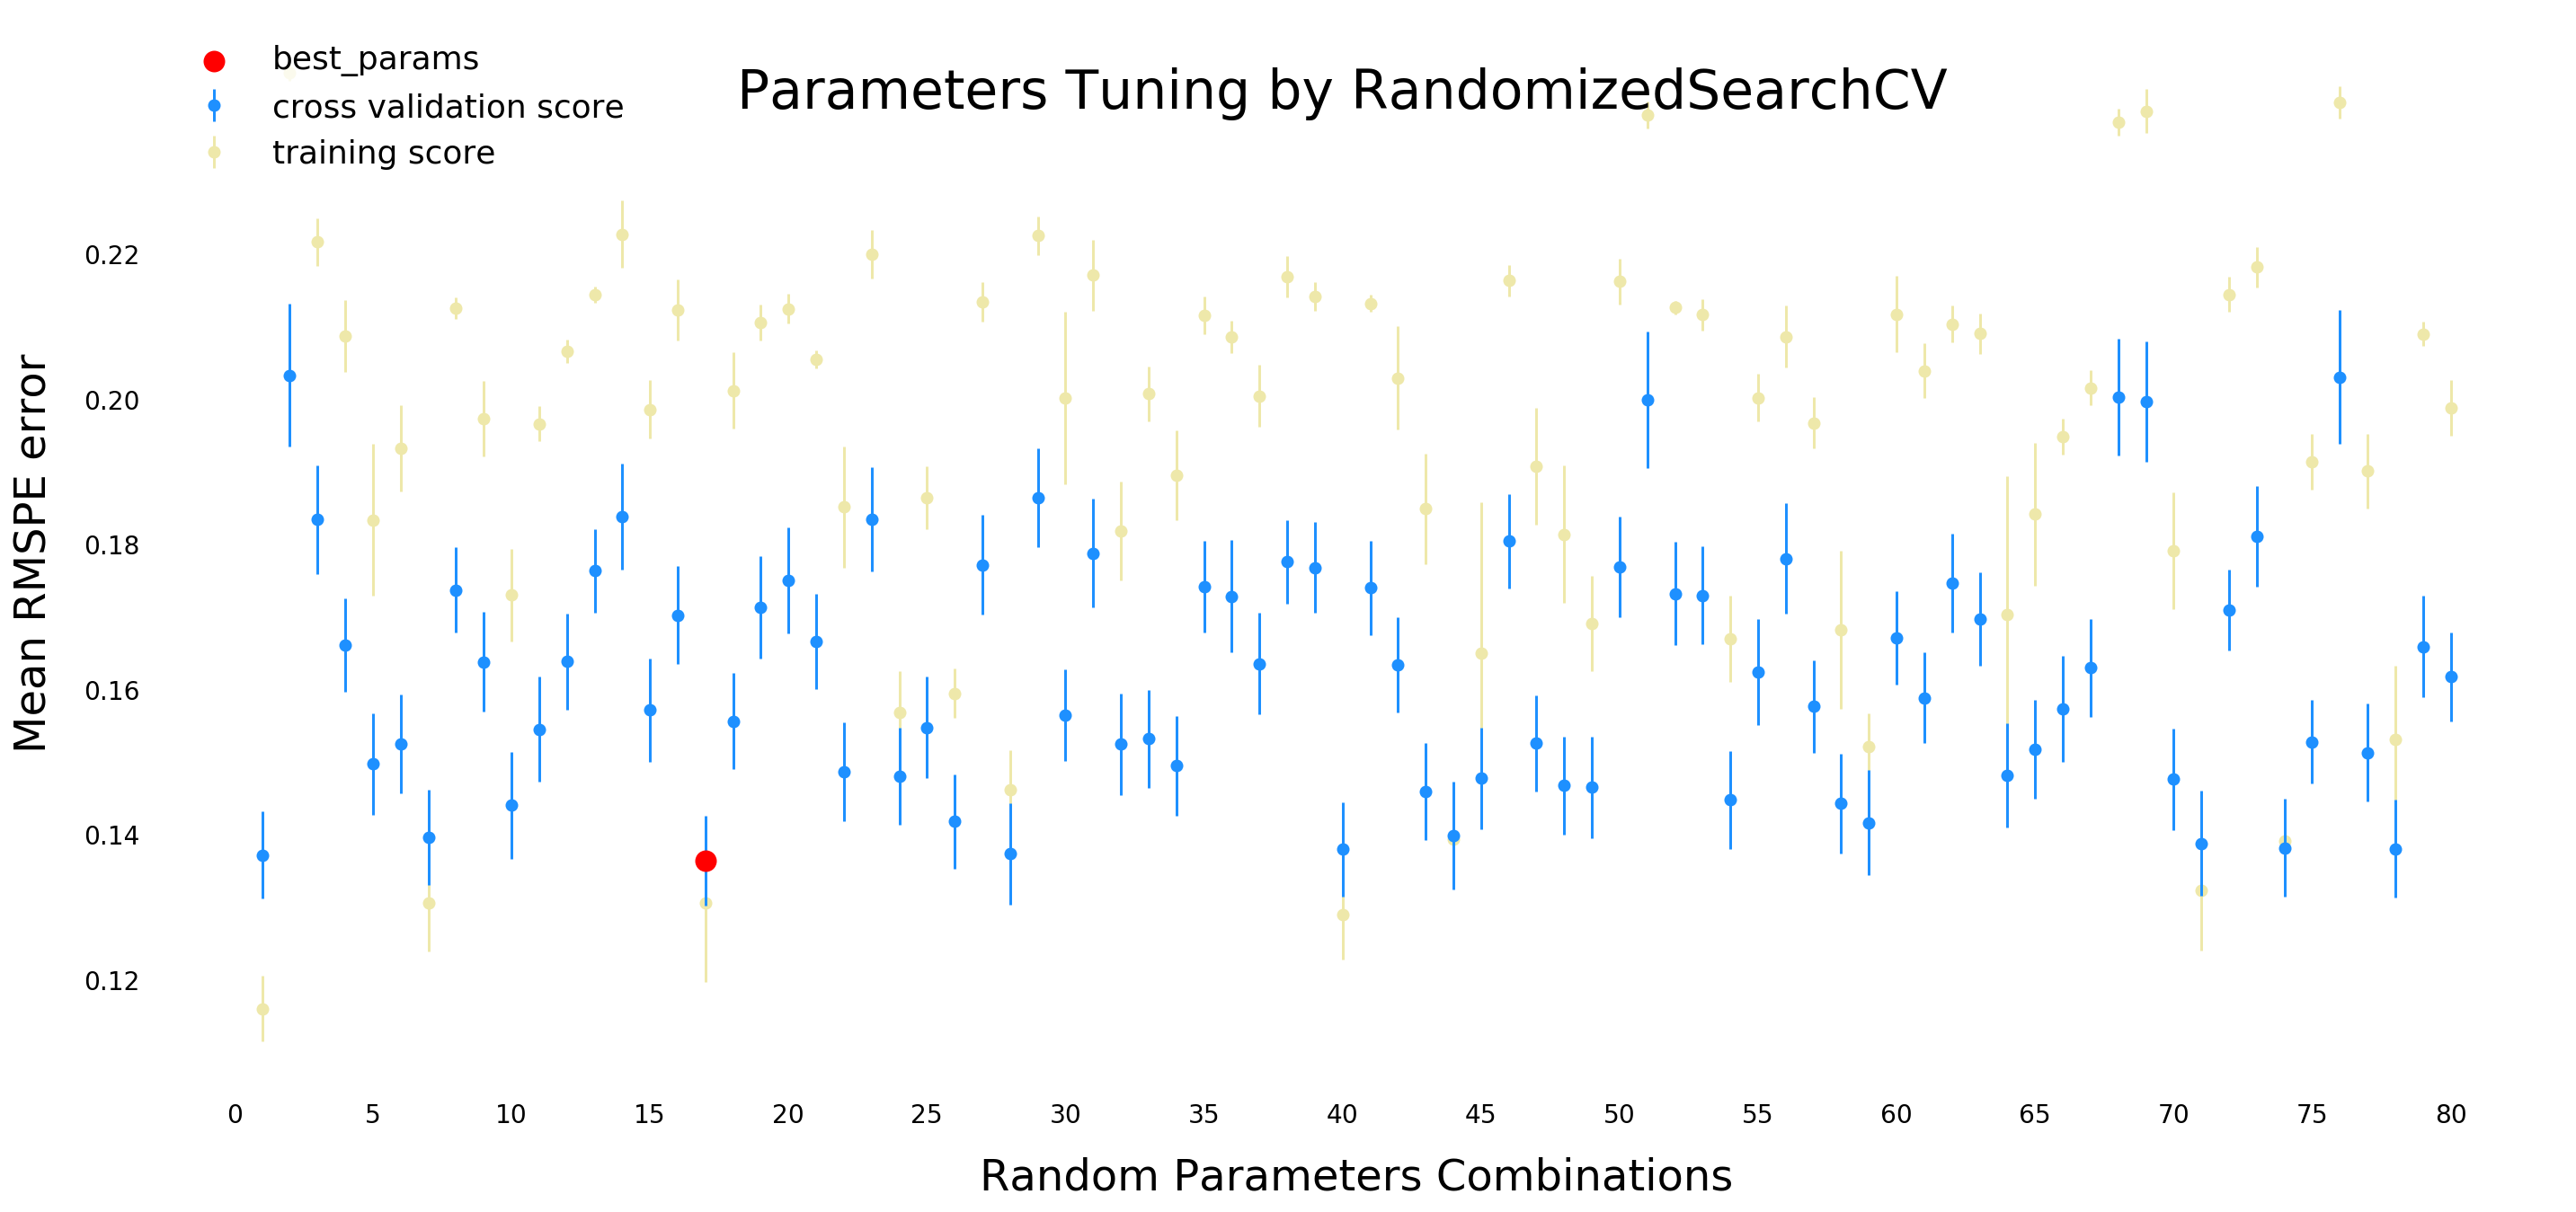

In [19]:
fig = plt.figure(figsize=(24,11))
ax = plt.gca()
ax.errorbar(np.arange(1,81), cv_result['mean_test_score'], cv_result['std_test_score'], linestyle='None', marker='o',zorder=2,c='#1E90FF',label="cross validation score")
ax.errorbar(np.arange(1,81), cv_result['mean_train_score'], cv_result['std_train_score'], linestyle='None', marker='o',zorder=1,c='#EEE8AA',label="training score")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Random Parameters Combinations',fontsize=24,labelpad = 16)
ax.set_ylabel('Mean RMSPE error',fontsize=24,labelpad = 16)
plt.setp(ax.get_xticklines(),visible=False)
plt.setp(ax.get_yticklines(),visible=False)
plt.scatter(17,0.136408,c='red',linewidths=6,zorder=3,label="best_params")
plt.xticks(np.arange(0,85,5),fontsize=14)
plt.yticks(np.arange(0.12,0.23,0.02),fontsize=14)
figure_title = "Parameters Tuning by RandomizedSearchCV"
plt.text(40, 0.24, figure_title,horizontalalignment='center',fontsize=30)
plt.legend(loc=2,prop={'size': 18},edgecolor='white')
plt.savefig(r'./pic/cv_results.png')

## learning_Curve --- rcv

In [25]:
learn_curve = pd.read_json('./json/learn_curve.json')

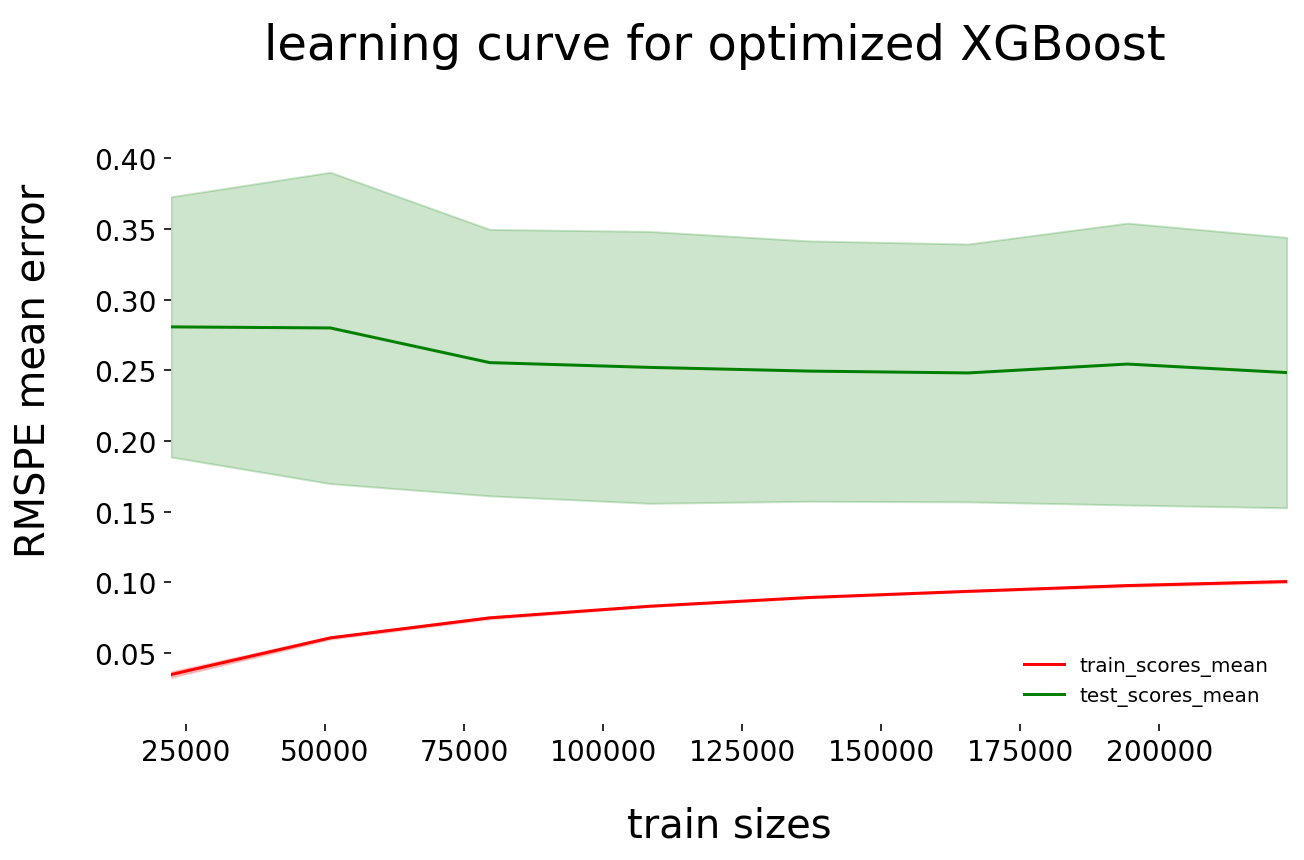

In [99]:
fig = plt.figure(figsize=(10,6.5))
ax = plt.gca()
learn_curve.plot('train_sizes','train_scores_mean',ax=ax,color='red')
learn_curve.plot('train_sizes','test_scores_mean',ax=ax,color='green')
ax.fill_between(learn_curve['train_sizes'],
                learn_curve['train_scores_mean'] - learn_curve['train_scores_std'],
                learn_curve['train_scores_mean'] + learn_curve['train_scores_std'],
                alpha=0.2,color='red')
ax.fill_between(learn_curve['train_sizes'],
                learn_curve['test_scores_mean'] - learn_curve['test_scores_std'],
                learn_curve['test_scores_mean'] + learn_curve['test_scores_std'],
                alpha=0.2,color='green')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.legend(loc=4,edgecolor='white')
ax.set_xlabel('train sizes',fontsize=20,labelpad = 20)
ax.set_ylabel('RMSPE mean error',fontsize=20,labelpad = 20)
plt.ylim([0,0.5])
plt.xticks(fontsize=14)
plt.yticks(np.arange(0.05,0.45,0.05),fontsize=14)
plt.text(120000, 0.47, "learning curve for optimized XGBoost",horizontalalignment='center',fontsize=24)
plt.savefig(r'./pic/learn_curve.png') # more train data would be better

In [52]:
# validation_score_800 = pd.read_json('validation_300_800.json')
# validation_score_1100 = pd.read_json('validation_1100.json')
# validation_score = pd.concat([validation_score_800,validation_score_1100],axis=0)
# validation_score.drop_duplicates(inplace=True)
# validation_score.sort_values('n_estimators',inplace=True)

In [ ]:
# fig = plt.figure(figsize=(10, 6))
# ax = plt.gca()
# ax.scatter('n_estimators','test_scores_mean',data=validation_score,c='g',label='mean score',zorder=1)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.yaxis.set_visible(False)
# plt.yticks(np.arange(0.19,0.196,0.005),fontsize=14)
# figure_title = 'Cross-Validation on different n_estimators'
# plt.text(698, 0.20263, figure_title,horizontalalignment='center',fontsize=24)
# plt.axhline(0.19132,linestyle = '--',color='#C0C0C0')
# plt.scatter(800,0.191839,c='red',linewidths=5,zorder=2,label="best n_estimastors")
# plt.legend(loc = 4,edgecolor='white')
# plt.savefig(r'./pic/n_estimator_optimization.png')

## feature importance pic

In [14]:
feature_importance = pd.read_json('./json/feature_importance.json')
feature_importance.sort_values('Gain',inplace=True)
feature_importance.reset_index(drop=True,inplace=True)
feature_importance['Gain']=feature_importance['Gain'] / feature_importance['Gain'].sum()

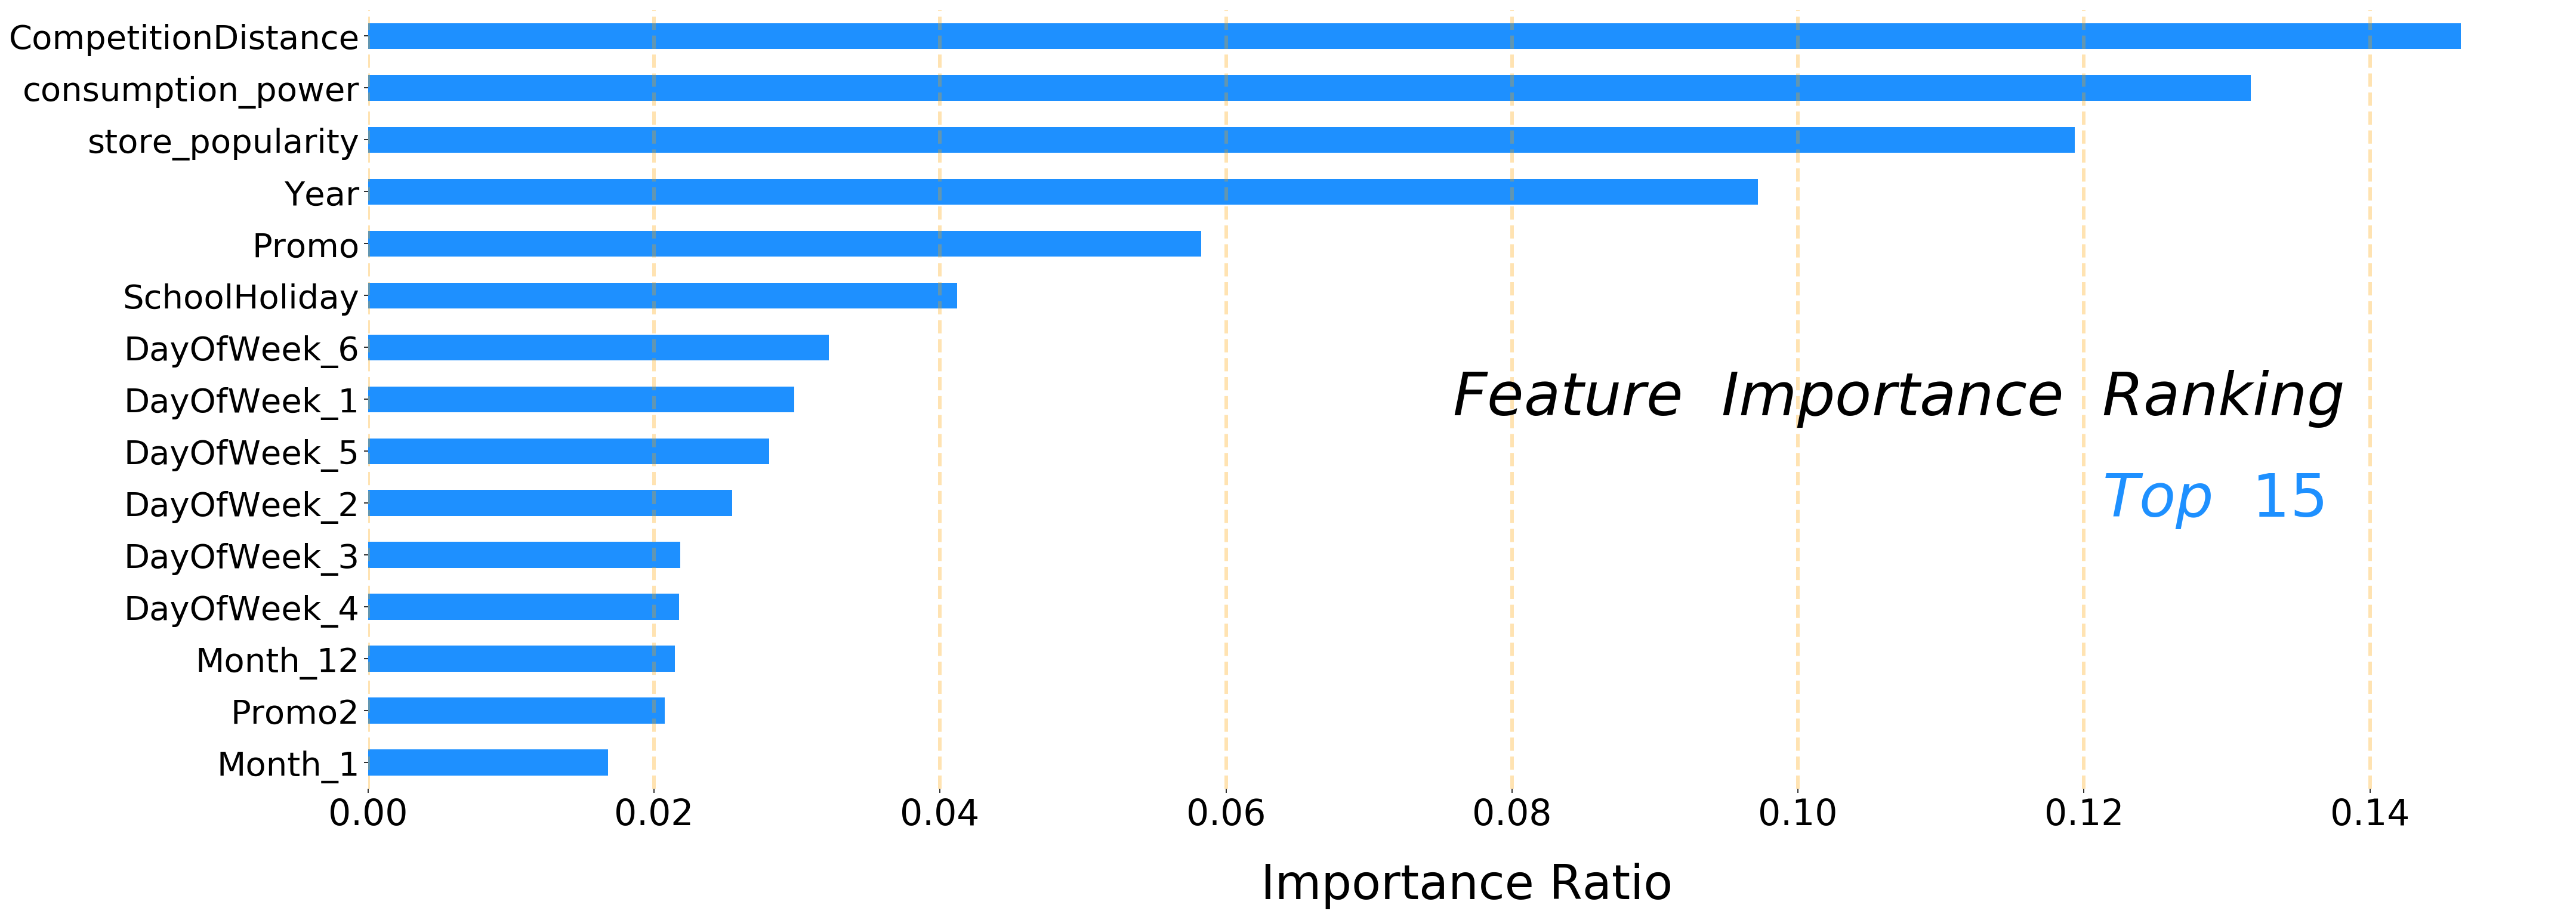

In [25]:
fig = plt.figure(figsize=(33, 12)) # 15 features has 80.8% influence
ax=plt.gca()
feature_importance.iloc[-15:,:].plot(x='Feature',y='Gain',kind='barh',ax=ax,legend=False,color='#1E90FF')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(fontsize=28)
plt.xticks(np.arange(0,0.15,0.02),fontsize=30)
plt.ylabel('')
ax.set_xlabel('Importance Ratio',fontsize=40,labelpad = 25)
ax.xaxis.grid(linestyle='--',alpha=0.3,linewidth=3,color='orange')
figure_title = r'$Feature \  \  Importance \  \  Ranking$'
plt.text(0.107,6.7, figure_title,horizontalalignment='center',fontsize=50,zorder=2)
plt.text(0.129,4.75, r"$Top \  \  15 $",horizontalalignment='center',color='#1E90FF',fontsize=50,zorder=2)
plt.savefig(r'./pic/feature_importance.png')